# Prueba de estabilidad en base a rho

Para comenzar con esta parte de la experimentación veremos el comportamiento del clasificador al haber hecho una modificación sobre las funciones de amplificación y difusión (ahora trabajan con los rho's modificados sobre la probabilidad condicional de los casos binarios que se están utilizando).



Para ello se importarán las librerias a utilizar:

In [1]:
import numpy as np
from modules.ternary_classifier import TernaryClassifier
import matplotlib.pyplot as plt

Ahora generamos el ejemplo que sabemos se comportaba mal anteriormente

In [2]:
R = np.array([1, 0, 0])
G = np.array([0, 1, 0])
B = np.array([0, 0, 1])

In [3]:
np.random.seed(42)
idx = np.random.choice(3, size=(10, 10))
x0 = np.array([R, G, B])[idx]


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(5, 5))
axs[0].imshow(x0*255)
axs[0].axis('off')
axs[0].set_title('Imagen inicial')
c = TernaryClassifier(x0, 1e-2, 100, 1)
for i in range(1000):
    if i % 100 == 0:
        print(f"Step {i}")
    c.alternated_step()
axs[1].imshow(c.grid)
axs[1].axis('off')
axs[1].set_title('Imagen final')

IndentationError: expected an indented block after 'if' statement on line 7 (3618971910.py, line 9)

Con esto se puede apreciar de que en efecto, lo que antes afectaba el resultado era la implementación errónea de las funciones que se utilizan para realizar los cambios en cada paso.

Ahora podemos continuar y ver como se comportan los rho con las proporciones de colores y con ello estudiar valores críticos.

In [5]:
np.random.seed(42)
idx = np.random.choice(3, size=(100, 100))
x0 = np.array([R, G, B])[idx]
valores = np.mean(x0, axis=(0, 1))
print(f"Valores medios de R, G, B: {valores}")

Valores medios de R, G, B: [0.3354 0.3347 0.3299]


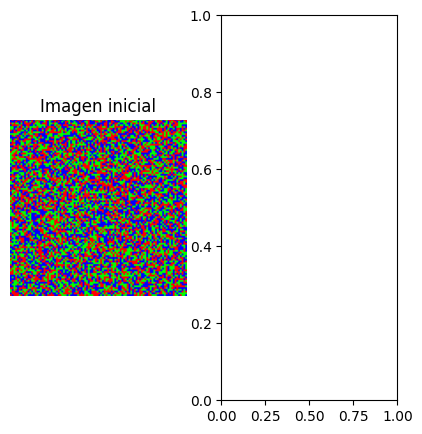

In [35]:
np.random.seed(42)
idx = np.random.choice(3, size=(100, 100))
x0 = np.array([R, G, B])[idx]
fig, axs = plt.subplots(1,2,figsize=(5, 5))
axs[0].imshow(x0*255)
axs[0].axis('off')
axs[0].set_title('Imagen inicial')
c = TernaryClassifier(x0, 1e-2, 100, 1)


In [8]:
for i in range(1000):
    if i % 100 == 0:
        print(f"Step {i}")
    c.alternated_step()
axs[1].imshow(c.grid)
axs[1].axis('off')
axs[1].set_title('Imagen final')

Step 0
Step 100
Step 200
Step 300
Step 400
Step 500
Step 600
Step 700
Step 800
Step 900


Text(0.5, 1.0, 'Imagen final')

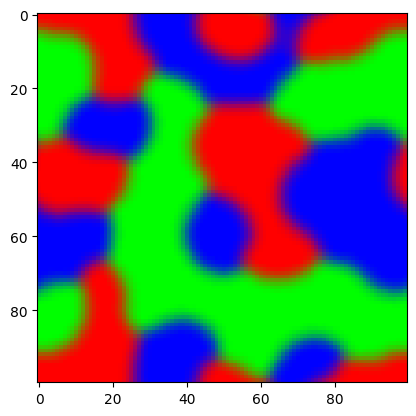

In [76]:
for _ in range(1500):
    c.alternated_step()
plt.imshow(c.grid)

In [78]:
x1 = c.grid
np.mean_x1 = np.mean(x1, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {np.mean_x1}")

Valores medios de R, G, B después de 1500 pasos: [0.31032758 0.37529331 0.31445494]


In [144]:
c.alternated_step()
x2 = c.grid
mean_x2 = np.mean(x2, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {mean_x2}")
sum_x2 = np.sum(mean_x2)
print(f"Suma de los valores medios de R, G, B después de 1500 pasos: {sum_x2}")

Valores medios de R, G, B después de 1500 pasos: [0.31005418 0.3758733  0.31414812]
Suma de los valores medios de R, G, B después de 1500 pasos: 1.0000755952228524


Con esto podemos observar que los valores son mayores a uno, lo cual debe haberse generado apartir de las aproximaciones numéricas. Por otro lado, observamos el caso curioso pues al iterar podemos ver cierta periodicidad en los valores, verde sube y luego baja. Es por ello que no se observan cambios desde esta grilla. 

Para estudiar el código y ver si esto es un caso borde utilizaremos la información actualmente disponible en la grilla, recordar que cada pixel de esta es un vector con 3 coordenadas  (RGB). A partir de esta información obtendremos el índice donde está el valor mayor de cada celda, fijaremos ese con valor 1 y el resto será fijado en 0. Todo esto con el objetivo de visualizar si al correr nuevamente el algoritmo este se queda atrapado denuevo o bien logra converger al color que ahora tiene clara diferencia (debiera ganar G).

In [145]:
def movimiento(grilla):
    # Obtener el índice del valor máximo en cada celda
    indices_max = np.argmax(grilla, axis=-1)
    
    # Crear una nueva grilla con valores 0
    nueva_grilla = np.zeros_like(grilla)
    
    # Asignar 1 al índice máximo de cada celda
    for i in range(grilla.shape[0]):
        for j in range(grilla.shape[1]):
            nueva_grilla[i, j, indices_max[i, j]] = 1
            
    return nueva_grilla

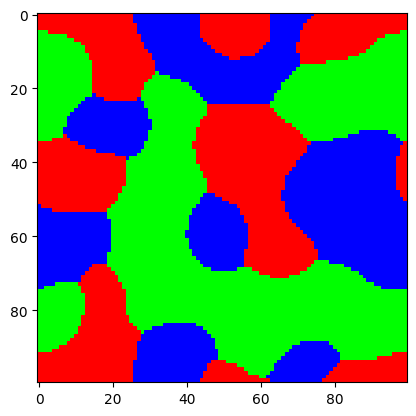

In [155]:
x_new = movimiento(x2)
plt.imshow(x_new)

In [156]:
d = TernaryClassifier(x_new, 1e-1, 200, 1)

In [157]:
d.alternated_step()
x2 = d.grid
mean_x2 = np.mean(x2, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {mean_x2}")
sum_x2 = np.sum(mean_x2)
print(f"Suma de los valores medios de R, G, B después de 1500 pasos: {sum_x2}")

Valores medios de R, G, B después de 1500 pasos: [0.305668  0.3809335 0.3134   ]
Suma de los valores medios de R, G, B después de 1500 pasos: 1.0000015000000002


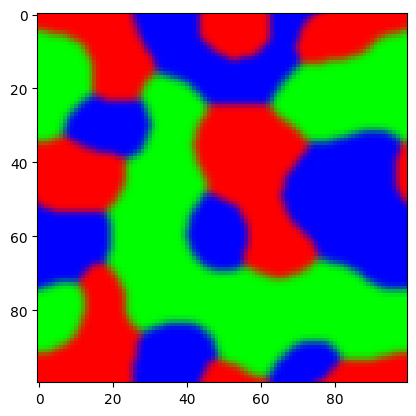

In [158]:
for _ in range(10):
    d.alternated_step()
plt.imshow(d.grid)

In [154]:
d.alternated_step()
x2 = d.grid
mean_x2 = np.mean(x2, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {mean_x2}")
sum_x2 = np.sum(mean_x2)
print(f"Suma de los valores medios de R, G, B después de 1500 pasos: {sum_x2}")

Valores medios de R, G, B después de 1500 pasos: [0.30577147 0.38091488 0.31336715]
Suma de los valores medios de R, G, B después de 1500 pasos: 1.0000535059761118


Con esto podemos observar que es en efecto un caso donde independientemente de que lo lancemos nuevamente el algoritmo se queda fijo y no logra salir de esto.

Como tenemos que esto es el primer caso grande que se estudió y con una cantidad similar entre valores samplearemos un caso más marcado, con igual dimensiones.

Valores medios de R, G, B: [0.25 0.5  0.25]


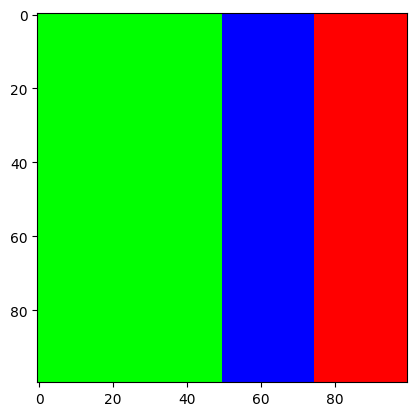

In [167]:
idx = np.zeros((100, 100), dtype=int)
for i in range(100):
    for j in range(100):
        if j < 50:
            idx[i, j] = 1
        elif j < 75:
            idx[i, j] = 2
        else:
            idx[i, j] = 0
            
x0 = np.array([R, G, B])[idx]
valores = np.mean(x0, axis=(0, 1))
print(f"Valores medios de R, G, B: {valores}")
plt.imshow(x0*255)

Con esto observamos que en estos casos de igual forma se queda pegado con los bordes definidos, esto puede implicar que al tener bordes definidos en ciertas partes el algoritmo no logra difundir la información para que genere un cambio en los datos. Otro aproach podría ser el generar un shuffle y con ello ver que sucede

Primero veremos si esto es una falla del sistema binario traspasada al caso ternario o resulta ser un error en la implementación.

In [13]:
caso2 = TernaryClassifier(x0, 0.0002, 5000, 1)
for i in range(200):
    if i % 10 == 0:
        print(f"Step {i}")
    caso2.alternated_step()
plt.imshow(caso2.grid)

Step 0


KeyboardInterrupt: 

In [14]:
from modules.binary_classifier import BinaryClassifier

Valores medios: 0.75


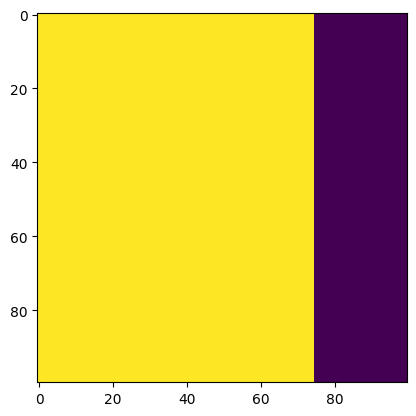

In [15]:
y0 = np.zeros((100, 100), dtype=int)
for i in range(100):
    for j in range(100):
        if j < 75:
            y0[i, j] = 1
        else:
            y0[i, j] = 0
            
valores = np.mean(y0)
print(f"Valores medios: {valores}")
plt.imshow(y0)

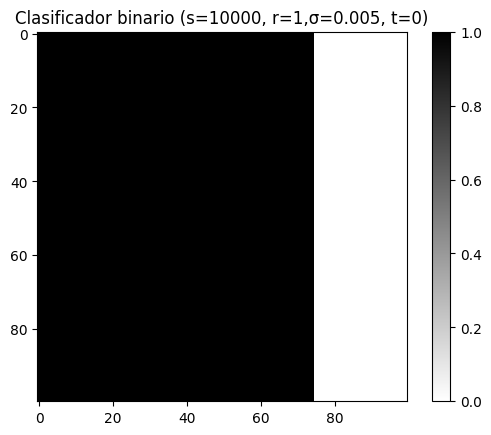

In [20]:
prueba = BinaryClassifier(y0, 0.005, 10000, 1)
prueba.show()

Step 0
Step 40
Step 80
Step 120
Step 160
Step 200
Step 240
Step 280
Step 320
Step 360
Step 400
Step 440
Step 480
Step 520
Step 560
Step 600
Step 640
Step 680
Step 720
Step 760
Step 800
Step 840
Step 880
Step 920
Step 960
Valores medios: 0.8209290000000001


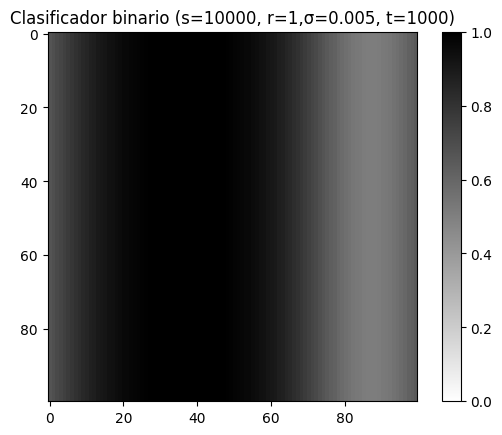

In [21]:
for i in range(1000):
    if i % 40 == 0:
        print(f"Step {i}")
    prueba.step()
valores = np.mean(prueba.grid)
print(f"Valores medios: {valores}")
prueba.show()